# Lista 4

**Wprowadzenie**

Załóżmy, że potrafimy generować zmienne losowe z rozkładu jednostajnego $U(0, 1)$. Metoda Boxa-Mullera pozwala na generowanie liczb losowych z rozkładu $N(0, 1)$.
Pseudokod algorytmu:
1. Generuj $U_1, U_2 ∼ U(0, 1),\ U_1 i U_2$ - niezależne.
2. Zwróć $X = \sqrt{−2 ln U_1} cos(2πU_2), Y = \sqrt{−2 ln U_1} sin(2πU_2)$.

Wygenerowane zmienne $X$ i $Y$ będą niezależne i będą miały rozkład $N(0, 1)$.


In [17]:
import numpy as np, random
import matplotlib.pyplot as plt

In [4]:
def boxMuller(n):
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)
    X = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    Y = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return X,Y

In [5]:
boxMuller(2)

(array([ 1.06995942, -1.71619492]), array([ 0.2187276 , -0.58776559]))

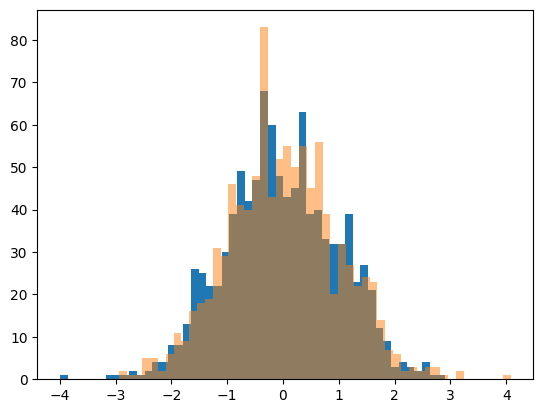

In [18]:
A, B = boxMuller(1000)
plt.hist(A, bins = 50)
plt.hist(B, bins = 50, alpha = 0.5)
plt.show()

In [6]:
def h():
    V1 = np.random.uniform(low=-1,high=1)
    V2 = np.random.uniform(low=-1,high=1)
    R2 = V1*V1 + V2*V2
    if R2<1:
        return V1, V2, R2
    else:
        return h()

In [7]:
def boxMuller2(n):
    a = [h() for _ in range(n)]
    V1,V2,R2 = [a[i][0] for i in range(n)], [a[i][1] for i in range(n)], [a[i][2] for i in range(n)]
    X = V1 * np.sqrt(-2 * np.log(R2) / R2)
    Y = V2 * np.sqrt(-2 * np.log(R2) / R2)
    return (X,Y)


In [8]:
X, Y = boxMuller2(1000)

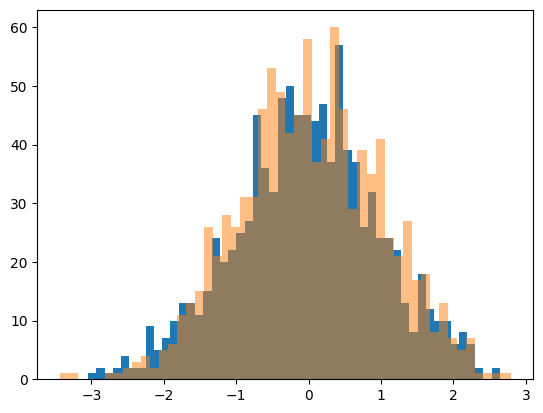

In [10]:
plt.hist(X, bins = 50)
plt.hist(Y, bins = 50, alpha = 0.5)
plt.show()

In [19]:
xs = np.arange(0, 10**5, 10**3)

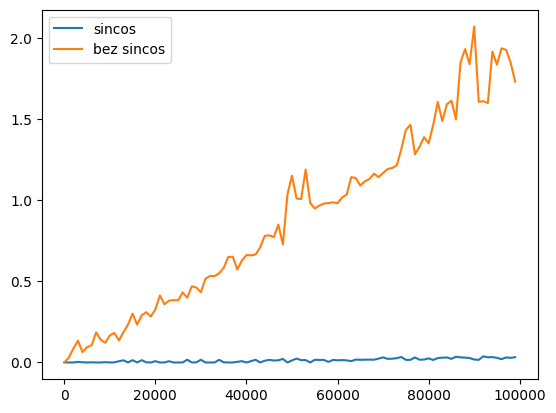

In [16]:
import time
times1 = []
times2 = []
for i in xs:
    q1 = time.time()
    boxMuller(i)
    times1.append(time.time()-q1)
    q2 = time.time()
    boxMuller2(i)
    times2.append(time.time()-q2)

plt.plot(xs, times1, label = 'sincos')
plt.plot(xs, times2, label = 'bez sincos')
plt.legend()
plt.show()